## Part1: Classification example using Iris dataset

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df
y = iris.target

In [2]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = RandomForestClassifier(n_estimators=5, class_weight="balanced", oob_score=True, random_state=1)
clf.fit(X_train, y_train)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [3]:
y_hat = clf.predict(X_test)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print("\n--------Test dataset classification report----------\n")
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_hat, target_names=target_names))


--------Test dataset classification report----------

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00        19
    class 1       1.00      1.00      1.00        15
    class 2       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00        50



In [5]:
print(np.unique(y_hat))
print(np.unique(y_test))

[0 1 2]
[0 1 2]


In [6]:
from skater.core.explanations import Interpretation
from skater.core.global_interpretation.tree_surrogate import TreeSurrogate
from skater.util.dataops import show_in_notebook

interpreter = Interpretation(X_test, feature_names=iris.feature_names)
# Using the interpreter instance invoke call to the TreeSurrogate
explainer_classifier = interpreter.tree_surrogate(estimator_type='classifier', feature_names=iris.feature_names, 
                               class_names=iris.target_names, seed=5)

In [7]:
# Using the surrogate model learn the decision boundaries learned by the base estimator
# Also report fidelity value when compared to the base estimator
explainer_classifier.learn(X_test, y_hat, oracle_y=y_test)

2018-07-16 06:48:13,237 - skater.model.base - WARNING - No examples provided, cannot infer model type


0.0

In [8]:
explainer_classifier.plot_global_decisions(colors=['coral', 'lightsteelblue','darkkhaki'], file_name='simple_tree.png')

2018-07-16 06:48:14,383 - skater.util.dataops - INFO - File Name: simple_tree.png


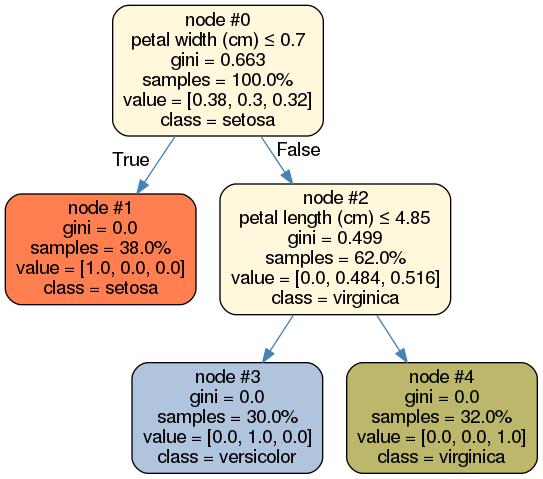

In [9]:
show_in_notebook('simple_tree.png')

## Part 2: Regression example

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
print("Info about the data: {}".format(boston.data.shape))
print("Feature Name: {}".format(boston.feature_names))

Info about the data: (506, 13)
Feature Name: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [12]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
data_df = pd.DataFrame(boston.data)
data_df.columns = boston.feature_names
data_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [14]:
X = data_df
Y = boston.target
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from xgboost import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
xg = XGBRegressor(n_estimators=70, learning_rate=0.09, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [18]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=70,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [19]:
y_pred_train = xg.predict(X_train)
y_pred_test = xg.predict(X_test)
# Evaluation on train
print("Training: Coefficient of Determination score: {}".format(r2_score(y_train, y_pred_train)))

print("Test: Coefficient of Determination score: {}".format(r2_score(y_test, y_pred_test)))

Training: Coefficient of Determination score: 0.9944232796421246
Test: Coefficient of Determination score: 0.8800796509256944


In [20]:
# Not sure, why but the plots resolution seems to be very bad, Lets see how Skater can help.
# plot_tree(xg, num_trees=1)
# plt.show()

In [21]:
interpreter = Interpretation(X_test, feature_names=X.columns)
# Using the interpreter instance invoke call to the TreeSurrogate
explainer = interpreter.tree_surrogate(estimator_type='regressor', feature_names=interpreter.feature_names, 
                               class_names=None, seed=5)

In [24]:
explainer.learn(X_test, y_pred_test, oracle_y=y_test, scorer_type='mse', n_iter_search=10)

2018-07-16 06:49:39,295 - skater.model.base - WARNING - No examples provided, cannot infer model type
2018-07-16 06:49:39,296 - skater.core.global_interpretation.tree_surrogate - WARNING - fidelity score:0.0975001498272543 of the surrogate model is higher than the impurity threshold: 0.01


0.0975001498272543

In [25]:
explainer.plot_global_decisions(file_name='regressor_surrogate.png')

2018-07-16 06:50:47,751 - skater.util.dataops - INFO - File Name: regressor_surrogate.png


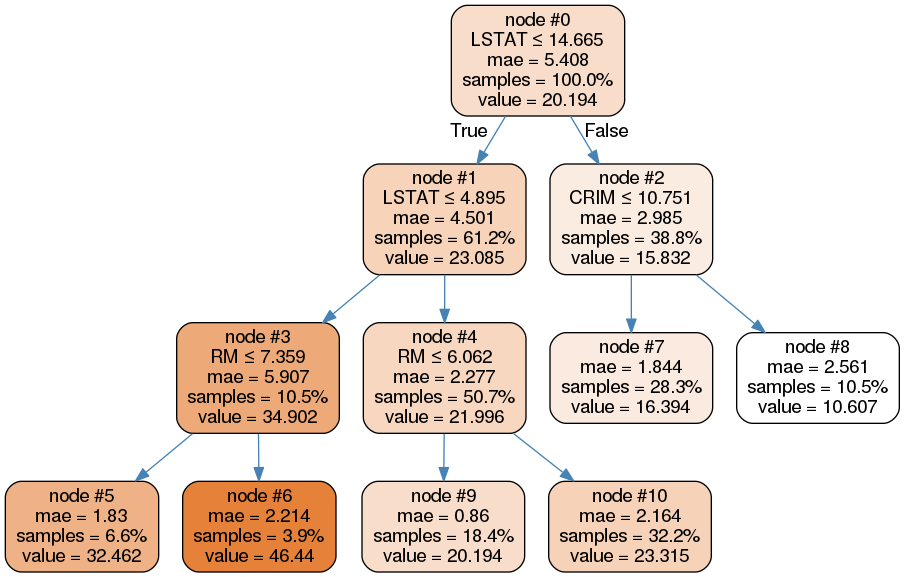

In [26]:
show_in_notebook('regressor_surrogate.png')